<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L3_Basic_Neural_Network_with_Softmax_Output_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Basic Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5108 - loss: 1.5217 - val_accuracy: 0.8315 - val_loss: 0.5619
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8842 - loss: 0.4350 - val_accuracy: 0.8960 - val_loss: 0.4072
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9156 - loss: 0.2997 - val_accuracy: 0.9025 - val_loss: 0.3586
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9294 - loss: 0.2519 - val_accuracy: 0.9090 - val_loss: 0.3386
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9425 - loss: 0.2096 - val_accuracy: 0.9120 - val_loss: 0.3219

Example predictions from the basic model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


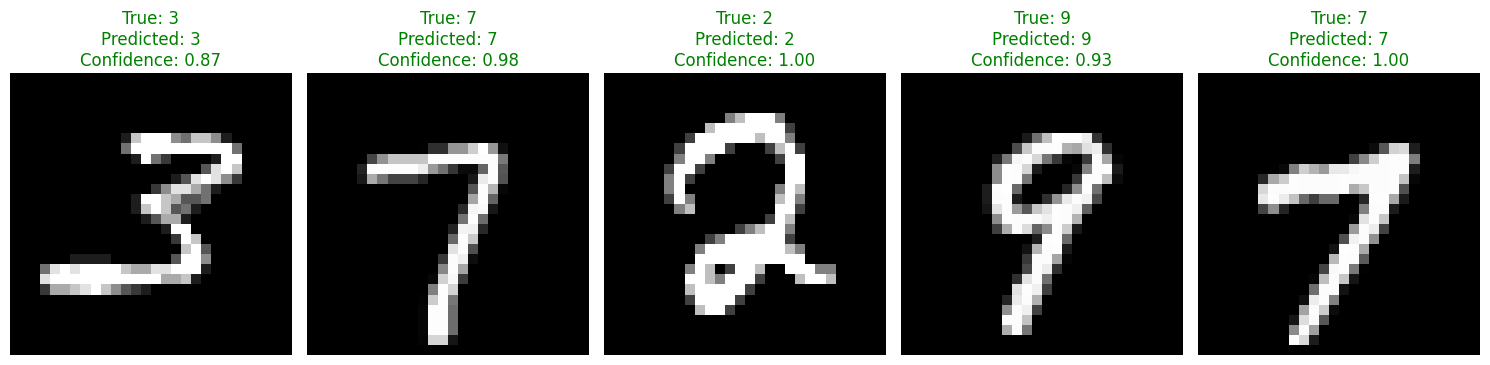

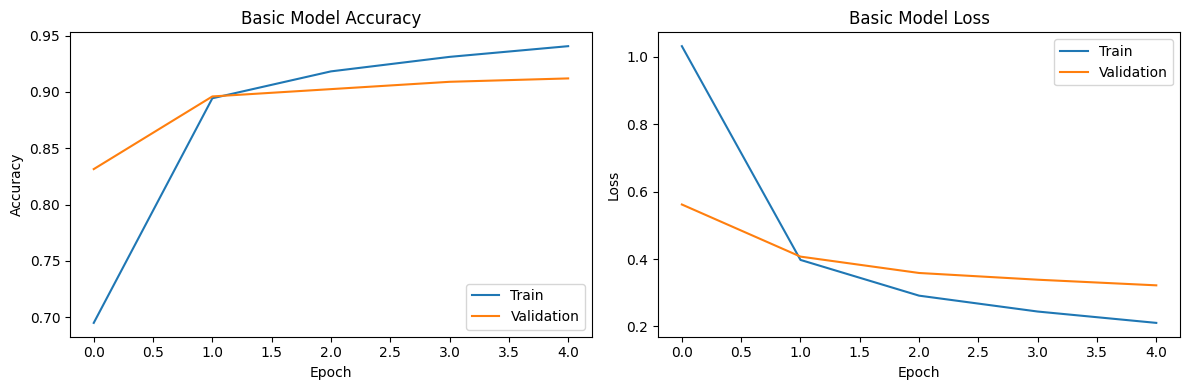

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images (convert 28x28 images to 784 pixel vectors)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Build a neural network with softmax output
# BASIC APPROACH (works okay, but not the most numerically stable)
model_basic = Sequential([
    # First hidden layer with 25 units and ReLU activation
    Dense(25, activation='relu', input_shape=(784,)),

    # Second hidden layer with 15 units and ReLU activation
    Dense(15, activation='relu'),

    # Output layer with 10 units (one for each digit) and softmax activation
    Dense(10, activation='softmax')
])

# Compile the model using SparseCategoricalCrossentropy loss
model_basic.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model architecture
print("Basic Model Architecture:")
model_basic.summary()

# Let's train the model with a small subset of data for demonstration
history_basic = model_basic.fit(
    X_train[:10000], y_train[:10000],
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Function to display some example predictions
def display_predictions(model, X_data, y_data, num_examples=5):
    # Get random samples
    indices = np.random.choice(len(X_data), num_examples, replace=False)

    # Get the model's predictions
    predictions = model.predict(X_data[indices])
    predicted_classes = np.argmax(predictions, axis=1)

    # Plot the results
    plt.figure(figsize=(15, 4))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_examples, i+1)
        plt.imshow(X_data[idx].reshape(28, 28), cmap='gray')

        # Show the true label and predictions
        title = f"True: {y_data[idx]}\nPredicted: {predicted_classes[i]}"
        # Add probability
        title += f"\nConfidence: {predictions[i][predicted_classes[i]]:.2f}"

        # Color red if incorrect, green if correct
        color = 'green' if y_data[idx] == predicted_classes[i] else 'red'
        plt.title(title, color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display some example predictions
print("\nExample predictions from the basic model:")
display_predictions(model_basic, X_test, y_test, 5)

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'])
plt.plot(history_basic.history['val_accuracy'])
plt.title('Basic Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot the training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history_basic.history['loss'])
plt.plot(history_basic.history['val_loss'])
plt.title('Basic Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()